In [1]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

from matplotlib.gridspec import GridSpec
from mpl_toolkits import mplot3d 


In [2]:
from networkx import graph_atlas_g

four_node_graphs = [g for g in graph_atlas_g() if len(g.nodes())==4]
print(len(four_node_graphs))


11


In [3]:
def get_vertices(graph):
    # Not sensible, but a good test
    return len(graph.nodes())

def get_edges(graph):
    return len(graph.edges())

def get_triangles(graph):
    # Returns the number of vertices in triangles
    return sum(nx.triangles(graph).values())/3

def get_isolates(graph):
    # Vertices without any edges to other vertices
    return len(list(nx.isolates(graph)))

def get_ergm_weight(graph, coefficients, statistics):
    '''
    Compute the ERGM numerator on graph with coefficients for a set of graph statistics    
    '''
    v = 0
    for i,stat in enumerate(statistics):
        v += coefficients[i] * stat(graph)        
    return np.exp(v)

def get_ergm_denominator(graph_set, coefficients, statistics):
    denom = 0
    for graph in graph_set:
        denom += get_ergm_weight(graph, coefficients, statistics)
    return denom
    
def coeffs_to_string(coefficients):
    s = ''
    for i,c in enumerate(coefficients):
        s += str(c)
        if i < len(coefficients) - 1:
            s += ', '
    return s
        
    


## Four-vertex graph set

### Build the set of four-vertex graphs

In [18]:
vertex_list = [0,1,2,3]
graph_set = []


# No edges
g = nx.Graph()
g.add_nodes_from(vertex_list)
graph_set.append(g)

c = list(itertools.combinations(vertex_list,2))
#print(c)
#print()
for t in c:
    g = nx.Graph()
    g.add_nodes_from(vertex_list)
    g.add_edge(t[0],t[1])
    graph_set.append(g)
    
p = list(itertools.combinations(c,2))
#print(p)
#print()
for t in p:
    g = nx.Graph()
    g.add_nodes_from(vertex_list)
    for a in t:
        g.add_edge(a[0],a[1])
    graph_set.append(g)

p = list(itertools.combinations(c,3))
#print(p)
#print()
for t in p:
    g = nx.Graph()
    g.add_nodes_from(vertex_list)
    for a in t:
        g.add_edge(a[0],a[1])
    graph_set.append(g)

p = list(itertools.combinations(c,4))
#print(p)
#print()
for t in p:
    g = nx.Graph()
    g.add_nodes_from(vertex_list)
    for a in t:
        g.add_edge(a[0],a[1])
    graph_set.append(g)

p = list(itertools.combinations(c,5))
#print(p)
#print()
for t in p:
    g = nx.Graph()
    g.add_nodes_from(vertex_list)
    for a in t:
        g.add_edge(a[0],a[1])
    graph_set.append(g)
    
p = list(itertools.combinations(c,6))
#print(p)
#print()
for t in p:
    g = nx.Graph()
    g.add_nodes_from(vertex_list)
    for a in t:
        g.add_edge(a[0],a[1])
    graph_set.append(g)

print(len(graph_set))

#for g in graph_set:
#    nx.draw_networkx(g,node_color='pink')
#    plt.show()



64


### Probability of a network statistic

Number of graphs containing a triangle: 23
Number of triangles in graph set: 32

Probability that a graph contains a triangle: 0.359375

Probability of graph: 0.2976592681416569

4.0


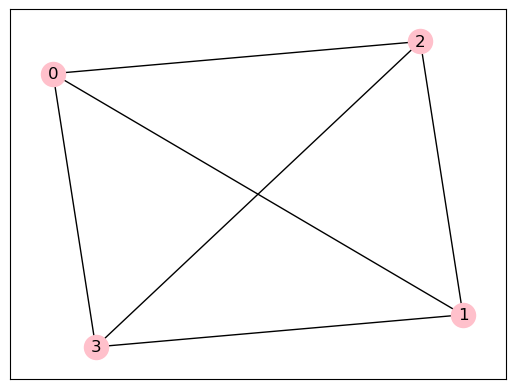

In [25]:
t = 0
r = 0
for g in graph_set:
    r += int(get_triangles(g))
    if get_triangles(g) > 0:
        t += 1
print('Number of graphs containing a triangle:',t)
print('Number of triangles in graph set:',r)
print()
print('Probability that a graph contains a triangle:',t/len(graph_set))
print()

# Compute the probability of a graph using the triangle network statistic
graph_index = 63

coefficients = [0.0,0.0,1.0]
statistics = [get_edges,get_isolates,get_triangles]

denom = get_ergm_denominator(graph_set, coefficients, statistics)

numerator = get_ergm_weight(graph_set[graph_index], coefficients, statistics)

print('ERGM probability of selected graph:',numerator/denom)
print()

print(get_triangles(graph_set[graph_index]))
nx.draw_networkx(graph_set[graph_index],node_color='pink')


### Distribution of network statistic

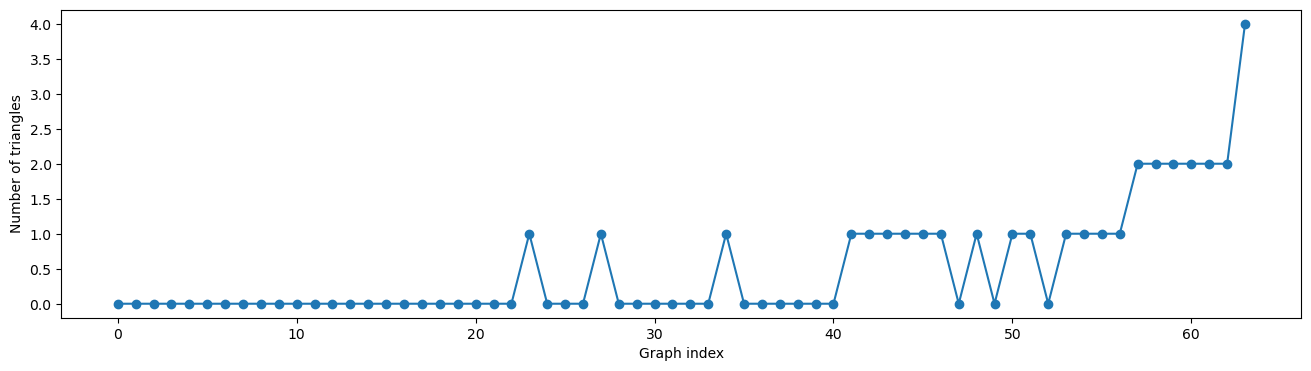

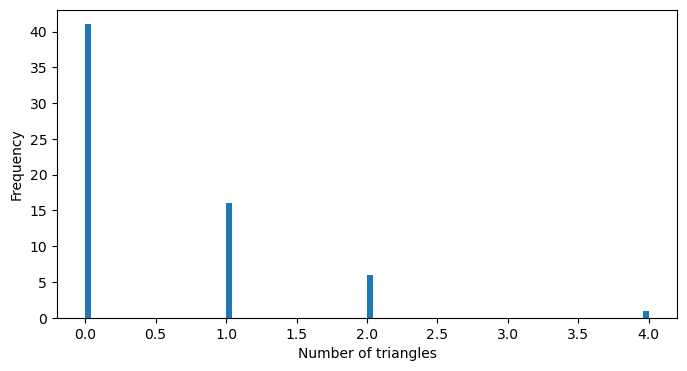

In [29]:
# Triangles

y = []
for g in graph_set:
    y.append(get_triangles(g))
    

fig = plt.figure(figsize=(16,4))
x = range(0,len(y))
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('Graph index')
plt.ylabel('Number of triangles')
plt.show()

fig = plt.figure(figsize=(8,4))
plt.hist(y,bins=100)
plt.xlabel('Number of triangles')
plt.ylabel('Frequency')
plt.show()
    

### Distribution of graph probabilities based on network statistics

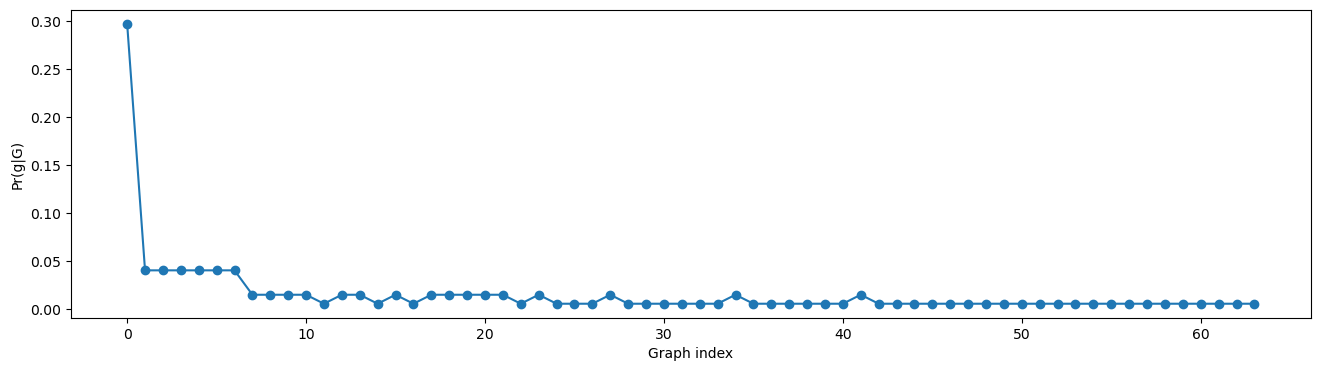

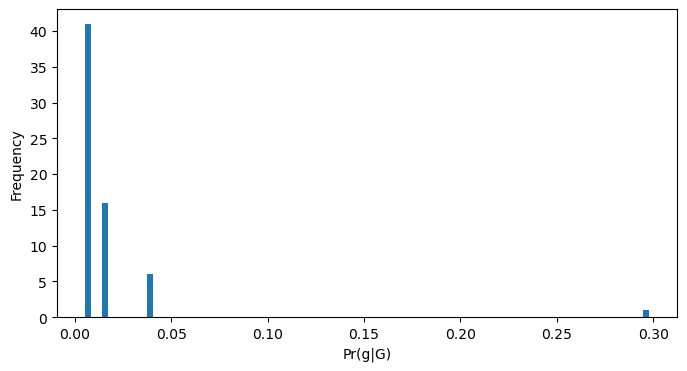

In [35]:
coefficients = [0.0,1.0,0.0]

statistics = [get_edges,get_isolates,get_triangles]
denom = get_ergm_denominator(graph_set, coefficients, statistics)

y = []
for g in graph_set:
    numerator = get_ergm_weight(g, coefficients, statistics)
    y.append(numerator/denom)

fig = plt.figure(figsize=(16,4))
x = range(0,len(y))
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('Graph index')
plt.ylabel('Pr(g|G)')
plt.show()

fig = plt.figure(figsize=(8,4))
plt.hist(y,bins=100)
plt.xlabel('Pr(g|G)')
plt.ylabel('Frequency')
plt.show()


## Build the set of three-node undirected graphs

In [ ]:
# Build the set of three node graphs as a sample set for denominator calculation
# This needs to be sensible

graph_set = []
g = nx.Graph()
g.add_nodes_from([0,1,2])
graph_set.append(g)

g = nx.Graph()
g.add_nodes_from([0,1,2])
g.add_edge(0,1)
graph_set.append(g)

g = nx.Graph()
g.add_nodes_from([0,1,2])
g.add_edge(0,2)
graph_set.append(g)

g = nx.Graph()
g.add_nodes_from([0,1,2])
g.add_edge(1,2)
graph_set.append(g)

g = nx.Graph()
g.add_nodes_from([0,1,2])
g.add_edge(0,1)
g.add_edge(0,2)
graph_set.append(g)

g = nx.Graph()
g.add_nodes_from([0,1,2])
g.add_edge(0,1)
g.add_edge(1,2)
graph_set.append(g)

g = nx.Graph()
g.add_nodes_from([0,1,2])
g.add_edge(0,2)
g.add_edge(1,2)
graph_set.append(g)

g = nx.Graph()
g.add_nodes_from([0,1,2])
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(1,2)
graph_set.append(g)

print(len(graph_set))


## Display the graph set with values of statistics

In [ ]:
fig = plt.figure(figsize=(8,4),layout="constrained")

gs = GridSpec(2, 4, figure=fig)

for i,g in enumerate(graph_set):
    ax = fig.add_subplot(gs[i//4,i%4])
    nx.draw_networkx(g,node_color='pink')
    title = str(get_edges(g)) + ', ' + str(get_isolates(g)) + \
        ', ' + str(get_triangles(g))
    ax.set_title(title)
plt.show()
    

## Play with coefficients for each graph in the set

- A graph can be considered the observed graph
- Display the probability of the observed graph given the coefficients


In [ ]:
coefficients = [1.0,0.0,1.0]
statistics = [get_edges,get_isolates,get_triangles]

fig = plt.figure(figsize=(8,4),layout="constrained")

gs = GridSpec(2, 4, figure=fig)

denom = get_ergm_denominator(graph_set, coefficients, statistics)

for i,g in enumerate(graph_set):
    numerator = get_ergm_weight(g, coefficients, statistics)
    pr = round(numerator/denom,3)

    ax = fig.add_subplot(gs[i//4,i%4])
    nx.draw_networkx(g,node_color='pink')
    title = 'Graph ' + str(i) + ' Pr = ' + str(pr)
    ax.set_title(title)
    
fig.suptitle(coeffs_to_string(coefficients))
plt.show()



## Effect of coefficient values for a single statistic

- Other coefficients are set to zero


In [ ]:

def pr_analysis(coeff_values,non_zero_coeff_values,statistics,label):    
    pr_dict = {}
    for t in coeff_values:
        # Other coefficients are 0
        coefficients = [t[0],t[1],t[2]]
        denom = get_ergm_denominator(graph_set, coefficients, statistics)

        for i,g in enumerate(graph_set):
            numerator = get_ergm_weight(g, coefficients, statistics)
            pr = round(numerator/denom,3)
            if i in pr_dict:
                pr_dict[i].append(pr)
            else:
                pr_dict[i] = [pr]
    fig = plt.figure(figsize=(8,4),layout="constrained")
    x = non_zero_coeff_values
    for k,v in pr_dict.items():
        plt.plot(x,v,label=str(k))
        plt.scatter(x,v)
    #plt.ylim(0,1)
    plt.xlabel('Value of ' + label + ' statistic coefficient')
    plt.ylabel('Pr of graph')
    plt.legend()
    plt.title(label)
    plt.show()

statistics = [get_edges,get_isolates,get_triangles]

non_zero_coeff_values = np.arange(0,1.1,0.1)
zero_values = np.zeros(len(non_zero_coeff_values))

coeff_values = list(zip(non_zero_coeff_values,zero_values,zero_values))
pr_analysis(coeff_values,non_zero_coeff_values,statistics,'Edges')

coeff_values = list(zip(zero_values,non_zero_coeff_values,zero_values))
pr_analysis(coeff_values,non_zero_coeff_values,statistics,'Isolates')

coeff_values = list(zip(zero_values,zero_values,non_zero_coeff_values))
pr_analysis(coeff_values,non_zero_coeff_values,statistics,'Triangles')



## Joint distributions for a pair of statistics

Using edges and triangles only.


In [ ]:
# Need a matrix of values for each graph

statistics = [get_edges,get_isolates,get_triangles]

g = graph_set[7]


non_zero_coeff_values = np.arange(0,1.1,0.1)

matrix = np.zeros((len(non_zero_coeff_values),len(non_zero_coeff_values)))


for i,x in enumerate(non_zero_coeff_values):
    for j,y in enumerate(non_zero_coeff_values):
        coefficients = [x,0,y]
        denom = get_ergm_denominator(graph_set, coefficients, statistics)
        numerator = get_ergm_weight(g, coefficients, statistics)
        pr = round(numerator/denom,3)
        matrix[i,j] = pr


plt.imshow(matrix)
plt.colorbar()
plt.ylabel('Edges coefficent')
plt.xlabel('Triangles coefficent')
#plt.clim(0,1)

plt.show()

m,n = matrix.shape
plt.figure(figsize=(16, 8))
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(non_zero_coeff_values, non_zero_coeff_values)
p = ax.plot_surface(X, Y, matrix, rstride=1, cstride=1, cmap='viridis', edgecolor='none',\
                    antialiased=False,vmin=0,vmax=1.0)
ax.set_zlim(0,1)
ax.set_ylabel('Edges coefficient')
ax.set_xlabel('Triangles coefficient')
ax.set_zlabel('Probability of graph')
#cbar = fig.colorbar(p,ax=ax)
#cbar.set_label('Probability of graph', rotation=270)

plt.show()


In [ ]:
# Need a matrix of values for each graph

statistics = [get_edges,get_isolates,get_triangles]
non_zero_coeff_values = np.arange(0,1.1,0.1)

fig = plt.figure(figsize=(20,20))

gs = GridSpec(4, 2, figure=fig)

for k,g in enumerate(graph_set):

    matrix = np.zeros((len(non_zero_coeff_values),len(non_zero_coeff_values)))


    for i,x in enumerate(non_zero_coeff_values):
        for j,y in enumerate(non_zero_coeff_values):
            coefficients = [x,0,y]
            denom = get_ergm_denominator(graph_set, coefficients, statistics)
            numerator = get_ergm_weight(g, coefficients, statistics)
            pr = round(numerator/denom,3)
            matrix[i,j] = pr

    m,n = matrix.shape
    ax = fig.add_subplot(gs[k%4,k//4])
    
    
    im = ax.imshow(matrix)
    #ax = plt.axes(projection='3d')
    #X, Y = np.meshgrid(non_zero_coeff_values, non_zero_coeff_values)
    #p = ax.plot_surface(X, Y, matrix, rstride=1, cstride=1, cmap='viridis', edgecolor='none',\
    #                    antialiased=False,vmin=0,vmax=1.0)
    #ax.set_zlim(0,1)
    ax.set_ylabel('Edges coefficient')
    ax.set_xlabel('Triangles coefficient')
    
    
    
    #ax.set_zlabel('Probability of graph')
    #ax.set_title('Graph: ' + str(k))
    #cbar = fig.colorbar(matrix,ax=ax)
    #cbar.set_label('Probability of graph', rotation=270)
    #fig.subplots_adjust(right=0.8)
    #cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, ax=ax)

plt.show()
